In [1]:
import numpy as np
import time

from src.models.bocs.LinReg import LinReg
from src.models.GPr import GPr
from ngboost import NGBRegressor
from ngboost.distns import LogNormal, Normal, Exponential
from ngboost.scores import CRPS, LogScore
from xgboost import XGBRegressor

# Learners
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

from src.problems.contamination import Contamination
from src.problems.rna import RNA
from src.problems.bqp import BQP
from src.problems.latin_square import LatinSquare

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



/Users/roinaveiro/miniconda/envs/tf-sbbo/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
/Users/roinaveiro/miniconda/envs/tf-sbbo/lib/python3.8/site-packages/gpflow/experimental/utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


# Contamination problem

In [ ]:
N = 300
opt = Contamination(n=N, lamda=0.0001)
X = opt.X
y = opt.y
test_set_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=0)

## GP

In [ ]:
m1 = GPr()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

## BOCS

In [ ]:
m2 = LinReg(nVars=25, order=2)
m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

## NGBoost - LinCV

In [ ]:
learner = LassoCV(cv=5)
m3 = NGBRegressor(Base=learner)
m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

# RNA problem

In [ ]:
N = 2000
opt = RNA(n=N)
X = opt.X
y = opt.y
test_set_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=1)

## NGBoost - LinCV

In [ ]:
linCV = LassoCV(cv=5)
lin = LinearRegression()
dec = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
m3 = NGBRegressor(Base=linCV, learning_rate=0.1, verbose_eval=5, 
                  n_estimators=50, Dist=Normal, Score=CRPS)
m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## GP

In [ ]:
m1 = GPr()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## BOCS

In [ ]:
m2 = LinReg(nVars=90, order=2,  nGibbs=500)
m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

# BQP problem

In [ ]:
N = 200
opt = BQP(n=N)
X = opt.X
y = opt.y + 10.0
test_set_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=0)

## NGBoost - LinCV

In [ ]:
linCV = LassoCV(cv=5)
lin = LinearRegression()
dec = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
xgb = XGBRegressor()
m3 = NGBRegressor(Base=lin)
m3 = NGBRegressor(Base=xgb, learning_rate=0.1, verbose_eval=5, n_estimators=30, Dist=Normal, Score=LogScore)

m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## GP

In [ ]:
m1 = GPr()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## BOCS

In [ ]:
m2 = LinReg(nVars=10, order=2,  nGibbs=500)
m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

# Latin Square problem

In [31]:
N = 1000
opt = LatinSquare(n=N)
test_set_size = 0.2
X = opt.X
y = opt.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=0)


Test R^2: -0.062
Test RMSE: 0.061 units
Test MAE: 0.050 units


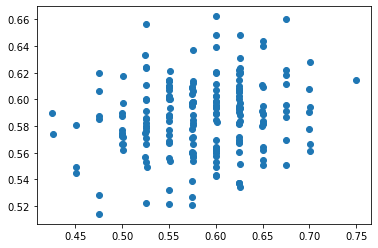

In [32]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## NGBoost - LinCV

In [33]:
linCV = LassoCV(cv=5)
lin = LinearRegression()
dec = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
xgb = XGBRegressor()
m3 = NGBRegressor(Base=lin)
m3 = NGBRegressor(Base=lin, learning_rate=0.1, verbose_eval=5, n_estimators=30, Dist=Normal, Score=LogScore)

m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))

[iter 0] loss=-1.4845 val_loss=0.0000 scale=0.5000 norm=0.2465
[iter 5] loss=-1.5363 val_loss=0.0000 scale=0.5000 norm=0.2239
[iter 10] loss=-1.5550 val_loss=0.0000 scale=0.5000 norm=0.2202
[iter 15] loss=-1.5639 val_loss=0.0000 scale=0.2500 norm=0.1109
[iter 20] loss=-1.5662 val_loss=0.0000 scale=0.2500 norm=0.1111
[iter 25] loss=-1.5674 val_loss=0.0000 scale=0.0625 norm=0.0278

Test R^2: -0.101
Test RMSE: 0.062 units
Test MAE: 0.050 units


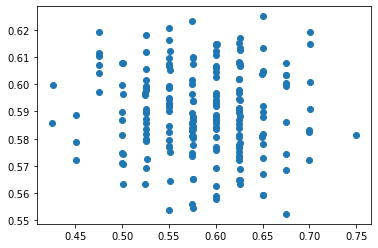

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## GP

In [35]:
m1 = GPr()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))


Test R^2: 0.035
Test RMSE: 0.058 units
Test MAE: 0.047 units


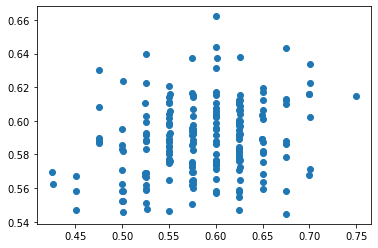

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

## BOCS

In [ ]:
m2 = LinReg(nVars=10, order=2,  nGibbs=500)
m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)

# Output R^2, RMSE and MAE on the test set
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nTest R^2: {:.3f}".format(score))
print("Test RMSE: {:.3f} units".format(rmse))
print("Test MAE: {:.3f} units".format(mae))